## Goals in Exploratory Data Analysis
* ###  Understand the data types
* ###  Detect any problems in the data file. 
* ###  Detect any outliers or data that is questionable. 
* ###  Understand the range/distribution of the variables
* ###  Visualize the relationship between the variables

## Iris Flower

[UCI Data Repository](https://archive.ics.uci.edu/)

[Iris Flower Images](https://en.wikipedia.org/wiki/Iris_flower_data_set)

### Small classic data set used in all teaching of data science


In [1]:
#change the file name + quick edits will work to walk thru data quickly
import pandas as pd
import numpy as np 
from matplotlib import pyplot as plt 
import seaborn as sns 
df = pd.read_csv('data/iris.csv')

### Pandas 
### We make use of pandas to load the data.  
### I am not a big user of pandas, because pandas is designed for 2-dimensional data, and as a neuroscientist I typically deal in 3 or 4 dimensional data, so I end up having to use my own tools. 
### You might find this tutorial useful. 
### [10 minutes to pandas](https://pandas.pydata.org/pandas-docs/stable/user_guide/10min.html)

### Lets look at the dataframe we just read in

In [2]:
#headings and first five columns
df.head()


,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


In [3]:
#all titles
df.keys()

Index(['sepal_length', 'sepal_width', 'petal_length', 'petal_width',
       'species'],
      dtype='object')

In [4]:
# How many data-points do we have?
print ("Number of data-points:",df.shape[0])

# How many features do we have? (this set has an extra "target" column -- don't do the -1 usually)
print ("Number of features:",df.shape[1]-1)


Number of data-points: 150
Number of features: 4


In [5]:
# How many samples do I have of each species
df["species"].value_counts()

setosa        50
versicolor    50
virginica     50
Name: species, dtype: int64

## Making plots using Seaborn
### The strength of seaborn over matplotlib is that they have figured out how to combine many plots that we would normally do individually into a single program call.   

/Users/syd/anaconda3/lib/python3.11/site-packages/seaborn/axisgrid.py:2095: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


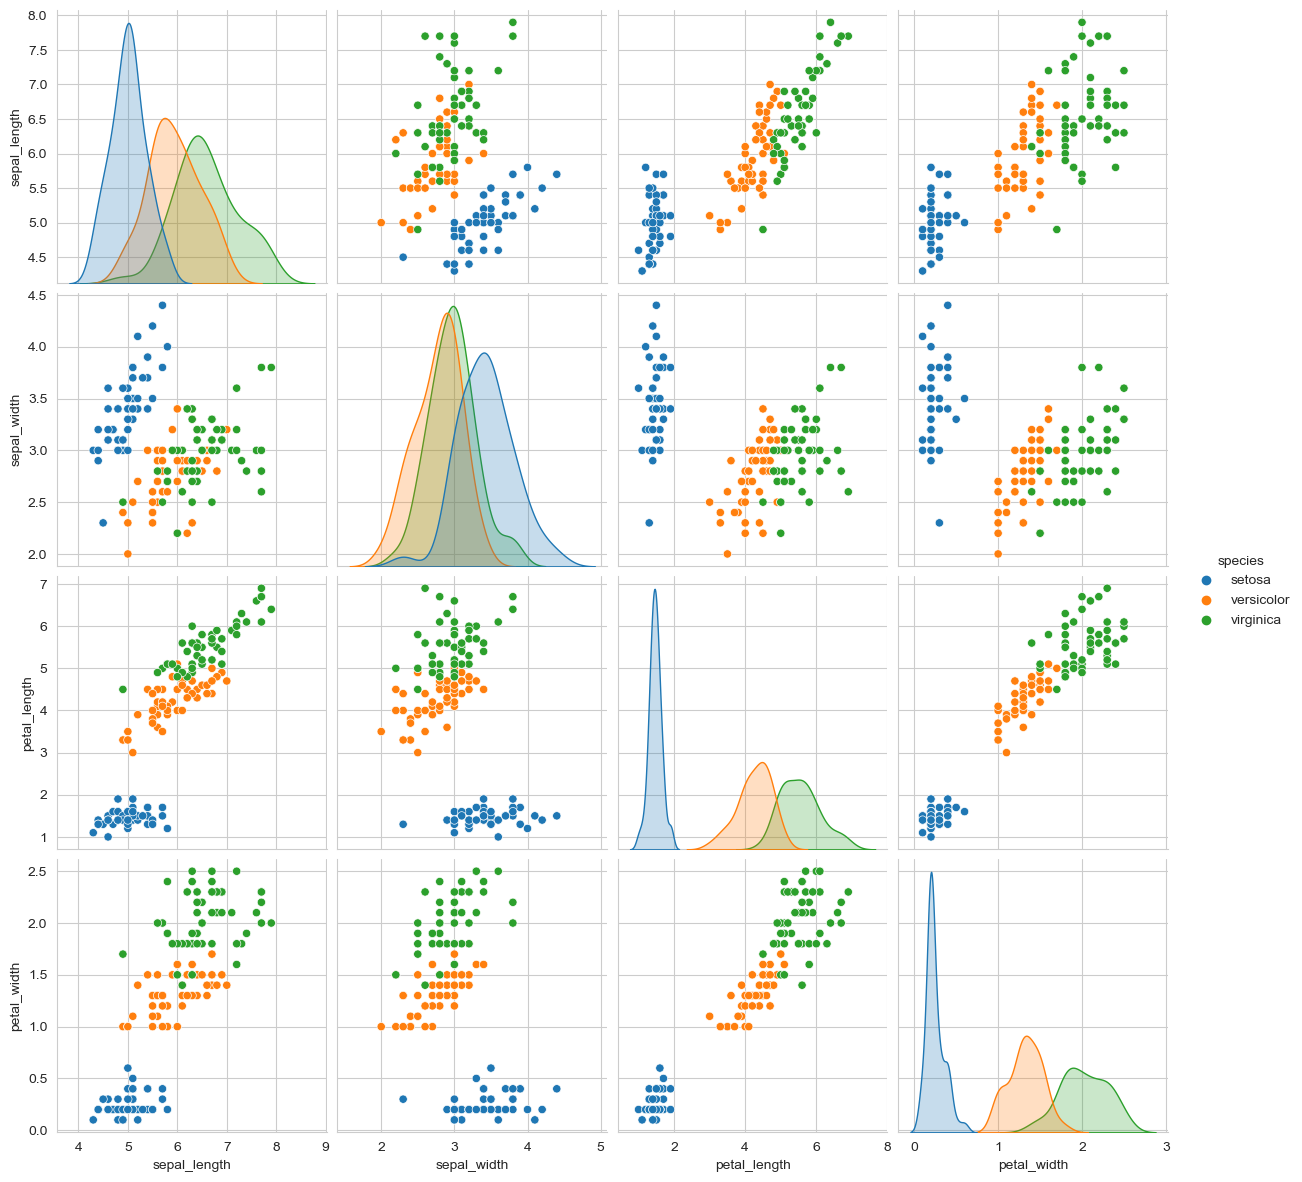

In [6]:

sns.set_style("whitegrid");
sns.pairplot(df, hue="species", size=3); #color based on target variable, size isn't necessary
plt.show()


##$ A boxplot can be extremely useful in detecting data that may have outliers.  

<Axes: >

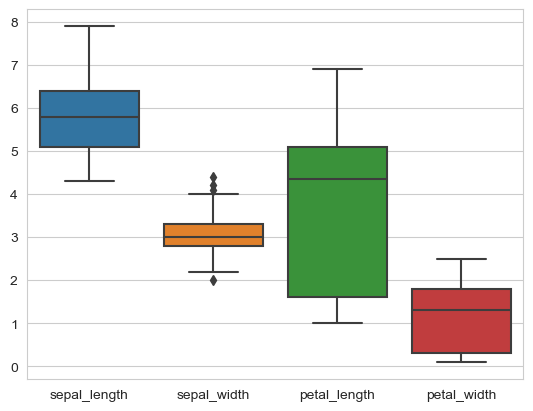

In [7]:
sns.boxplot(data=df)

<Axes: >

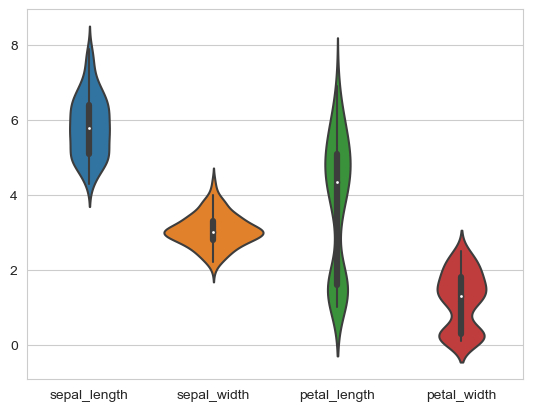

In [8]:
sns.violinplot( data=df)

### But my favorite is the swarm plot 

<Axes: xlabel='species', ylabel='petal_length'>

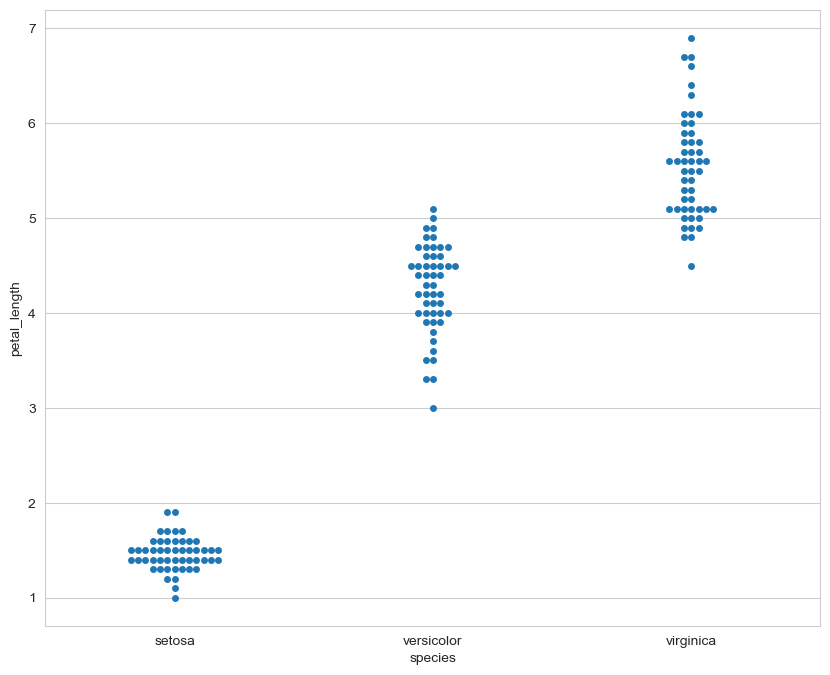

In [17]:
#figure size is width, height
plt.figure(figsize=(10,8)) 
sns.swarmplot(y='petal_length', x='species', data=df)



<Axes: xlabel='species', ylabel='sepal_width'>

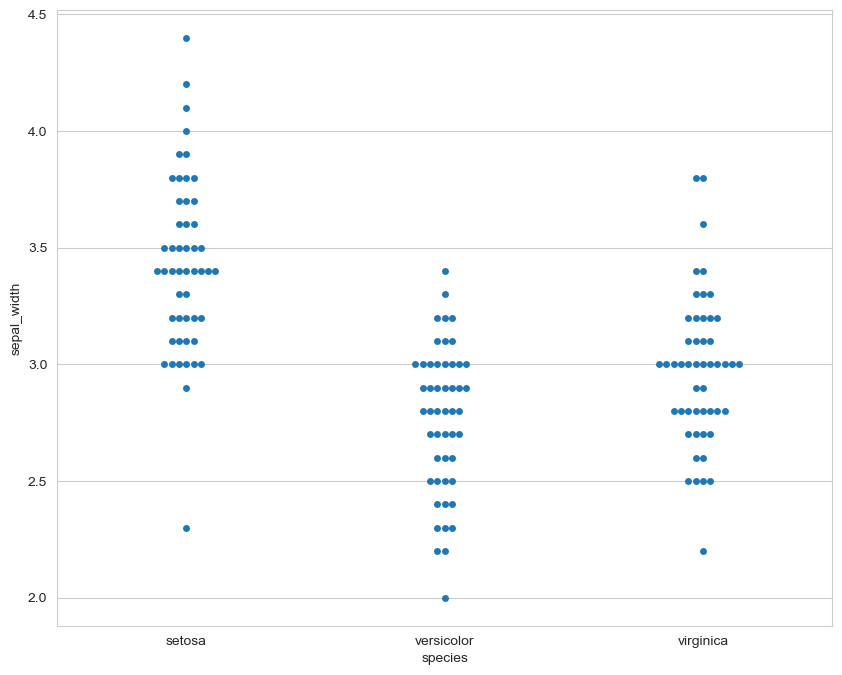

In [10]:

plt.figure(figsize=(10,8)) 
sns.swarmplot(y='sepal_width', x='species', data=df)


## Its also useful to look at histograms with kernal density estimates 

<Axes: xlabel='petal_length', ylabel='Count'>

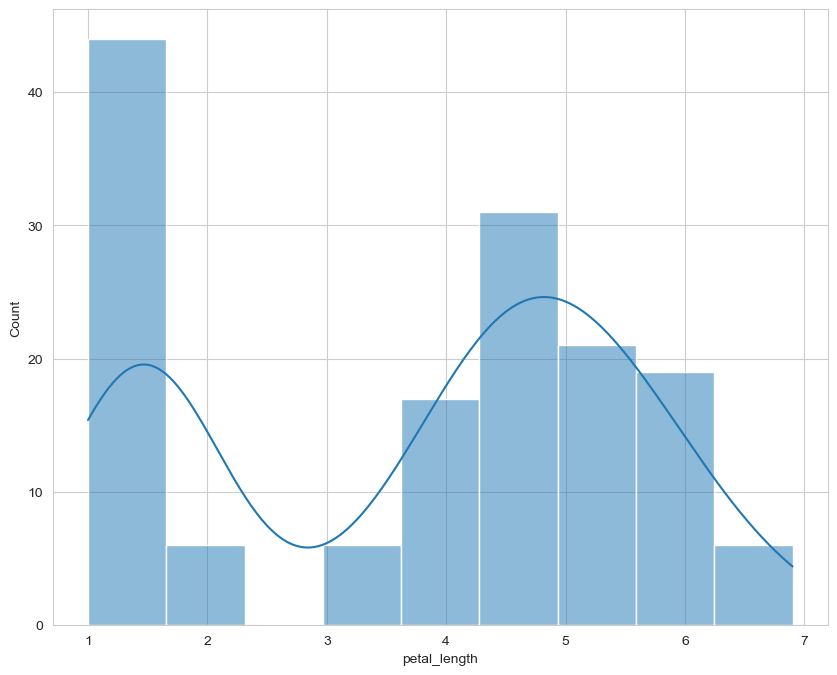

In [11]:
plt.figure(figsize=(10,8))
sns.histplot(df, x='petal_length',
             kde=True)

### But what is really useful is to look at joint plots 

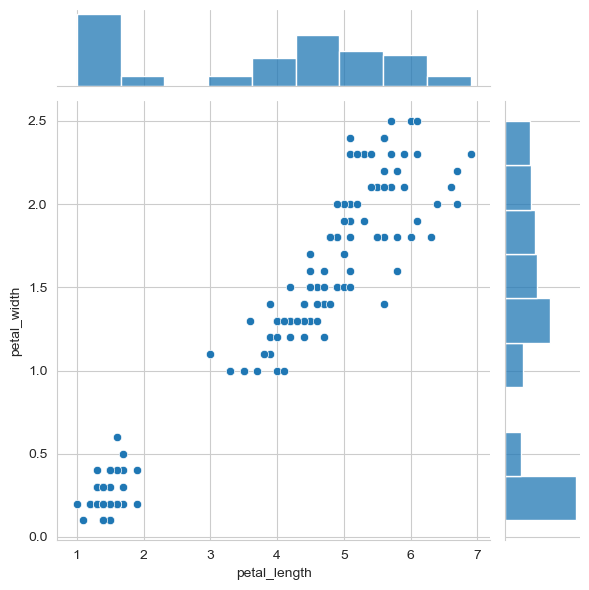

In [12]:
sns.jointplot(x='petal_length', y='petal_width', data=df)

### So, it might be very important for us to understand the correlation between variables. 

/var/folders/lc/r9_sjq_n165dx4bb7dgryp240000gn/T/ipykernel_51365/973422674.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)


<Axes: >

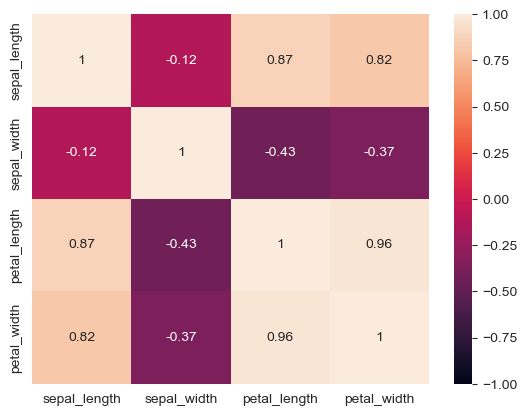

In [13]:
sns.heatmap(df.corr(), vmin=-1, vmax=1, annot=True)
#average highly coorelated variables to make latent variables 